Given the following linear model: $$y = X\beta + e$$ 

we can calculate $\beta$ as: $$\beta = (X^T X)^{-1} X^T y$$

In [23]:
#simulated data
n = 100
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(5)
x = np.arange(0,100)
y = 100 - 7 * x + 200*np.random.rand(100)

**Least square error solution**

In [24]:
X = np.array([[1 for j in range(n)],list(x)])
X = X.T

In [25]:
beta = np.dot(np.linalg.inv( np.dot(X.T,X) ), np.dot(X.T,y) )

In [26]:
beta

array([193.82139249,  -6.90705746])

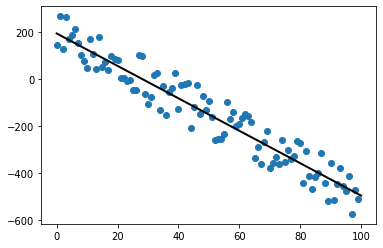

In [31]:
plt.scatter(x,y)
plt.plot([0, 100], [beta[0] + beta[1]*0, beta[0] + beta[1]*100], color='k', linestyle='-', linewidth=2)
plt.show()

**Gradient descent**

$w = w - \alpha \nabla_w J$

$J = \frac{1}{n} (y-Xw)^T(y-Xw)$

$\nabla J = \frac{2}{n} X^T (Xw-y)$

In [ ]:
w

In [98]:
def w(alpha=0.0001,conv = 0.001, X=None,y=None,w=np.array([0,0]),epochs = 100000):
    d = 1
    n = X.shape[0]
    itera = 0
    J = 1e6
    loss = {}
    while(d>conv):  
        itera = itera + 1
        if itera == epochs:
            break
        if itera % 1000 == 0:            
            print(itera, 'Loss: ', J )        
        w = np.add(w,-alpha * 2/n * np.dot( X.T, np.add( np.dot(X,w),-y) ) )           
        J_ant = J
        J = (1/n) * np.dot(np.add(y, -np.dot(X,w)).T, np.add(y, -np.dot(X,w)))
        d = np.abs(J-J_ant)
        loss[itera] = J
    return({'w':w,'loss': loss})
w_gd = w(X = X, y = y)

1000 Loss:  12277.18135824402
2000 Loss:  11445.342860796629
3000 Loss:  10693.782698977546
4000 Loss:  10014.753442016217
5000 Loss:  9401.255341353923
6000 Loss:  8846.964173988687
7000 Loss:  8346.166049450992
8000 Loss:  7893.698508370356
9000 Loss:  7484.8973054493845
10000 Loss:  7115.548328259818
11000 Loss:  6781.844156216651
12000 Loss:  6480.344811920771
13000 Loss:  6207.942300276149
14000 Loss:  5961.828569834722
15000 Loss:  5739.466566099551
16000 Loss:  5538.5640783901745
17000 Loss:  5357.050110671611
18000 Loss:  5193.05353276664
19000 Loss:  5044.883791877929
20000 Loss:  4911.013485585624
21000 Loss:  4790.062616674713
22000 Loss:  4680.784367483569
23000 Loss:  4582.0522471291515
24000 Loss:  4492.848479116483
25000 Loss:  4412.253509626379
26000 Loss:  4339.436528328128
27000 Loss:  4273.646904001256
28000 Loss:  4214.206446680693
29000 Loss:  4160.502416560042
30000 Loss:  4111.981207585368
31000 Loss:  4068.142640627285
32000 Loss:  4028.534807402402
33000 Loss: 

In [91]:
beta

array([193.82139249,  -6.90705746])

In [100]:
w_gd['w']

array([187.59046341,  -6.8131166 ])

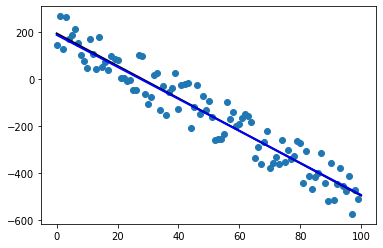

In [101]:
plt.scatter(x,y)
plt.plot([0, 100], [beta[0] + beta[1]*0, beta[0] + beta[1]*100], color='k', linestyle='-', linewidth=2)
plt.plot([0, 100], [w_gd['w'][0] + w_gd['w'][1]*0, w_gd['w'][0] + w_gd['w'][1]*100], 
         color='b', linestyle='-', linewidth=2)
plt.show()

**Loss function per iteration**

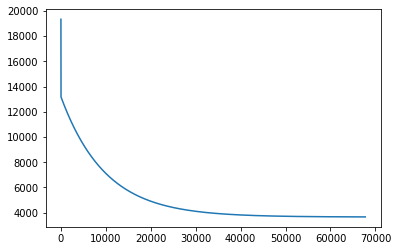

In [112]:
l = [[j,w_gd['loss'][j]] for j in w_gd['loss']]
x1 = [j[0] for j in l ]
y1 = [j[1] for j in l ]
plt.plot(x1,y1)